In [92]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df= pd.read_csv('food_coded.csv')

In [94]:
df.head()

,GPA,Gender,weight,height,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,...,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories
0,2.4,2,84.8,1.70,1,430,NaN,315.0,1,none,...,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315
1,3.654,1,70,1.70,1,610,3.0,420.0,2,"chocolate, chips, ice cream",...,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900
2,3.3,1,I'm not answering this.,1.46,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food",...,6.0,1.0,2.0,5,1165.0,500,none,5,1,900
3,3.2,1,"Not sure, 240",1.57,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",...,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315
4,3.5,1,86.18248,1.64,1,720,2.0,420.0,2,"Ice cream, chocolate, chips",...,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   weight                        123 non-null    object 
 3   height                        125 non-null    float64
 4   breakfast                     125 non-null    int64  
 5   calories_chicken              125 non-null    int64  
 6   calories_day                  106 non-null    float64
 7   calories_scone                124 non-null    float64
 8   coffee                        125 non-null    int64  
 9   comfort_food                  124 non-null    object 
 10  comfort_food_reasons          123 non-null    object 
 11  comfort_food_reasons_coded    106 non-null    float64
 12  cook                          122 non-null    float64
 13  comfo

In [96]:
df.shape

(125, 62)

In [97]:
def is_strictly_numeric(x):
    if pd.isna(x):
        return False
    try:
        float(x)
        return True
    except ValueError:
        return False
    s = str(x).strip()
    return bool(re.fullmatch(r"[+-]?\d+(\.\d+)?([eE][+-]?\d+)?", s))

In [98]:
df['weight_clean'] = df['weight'].apply(lambda x: float(str(x).strip()) if is_strictly_numeric(x) else np.nan)

In [99]:
df['height_clean'] = pd.to_numeric(df['height'], errors='coerce')
df = df[(df['height_clean'] >= 1.2) & (df['height_clean'] <= 2.2)].copy()

In [100]:
df['BMI'] = df['weight_clean'] / (df['height_clean'] ** 2)

In [101]:
df.BMI

,BMI
0,29.342561
1,24.221453
2,NaN
3,NaN
4,32.042861
...,...
120,24.775166
121,27.280083
122,21.803813
123,21.440048


In [102]:
def bmi_category(bmi):
    if pd.isna(bmi):
        return np.nan
    if bmi < 18.5:
        return 'Underweight'
    if bmi < 25:
        return 'Normal'
    if bmi < 30:
        return 'Overweight'
    return 'Obese'

In [103]:
df['BMI_category'] = df['BMI'].apply(bmi_category)

In [104]:
print("Rows after cleaning:", df.shape[0])
print(df[['weight', 'weight_clean', 'height', 'height_clean', 'BMI']].head(10))
print(df[['weight_clean','height_clean','BMI']].describe())

Rows after cleaning: 125
                     weight  weight_clean  height  height_clean        BMI
0                      84.8     84.800000    1.70          1.70  29.342561
1                        70     70.000000    1.70          1.70  24.221453
2  I'm not answering this.            NaN    1.46          1.46        NaN
3             Not sure, 240           NaN    1.57          1.57        NaN
4                  86.18248     86.182480    1.64          1.64  32.042861
5                  86.18248     86.182480    1.59          1.59  34.089822
6                  81.64656     81.646560    1.82          1.82  24.648762
7                 62.142104     62.142104    1.82          1.82  18.760447
8                  81.64656     81.646560    1.68          1.68  28.928061
9                    56.699     56.699000    1.60          1.60  22.148047
       weight_clean  height_clean         BMI
count    121.000000    125.000000  121.000000
mean      71.837261      1.658160   26.400969
std       14

In [105]:
df.to_csv('/content/food_coded_cleaned.csv', index=False)
print("Saved cleaned file to /content/food_coded_cleaned.csv")

Saved cleaned file to /content/food_coded_cleaned.csv


In [106]:
df['employment'].unique()

array([ 3.,  2.,  1., nan])

In [107]:
features = [
    'eating_out',
    'exercise',
    'fries',
    'fruit_day',
    'veggies_day',
    'employment'
]
df_features = df[features + ['breakfast', 'BMI']].copy()
for col in features:
    df_features[col] = pd.to_numeric(df_features[col], errors='coerce')

missing_counts = df_features.isna().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 eating_out      0
exercise       13
fries           0
fruit_day       0
veggies_day     0
employment      9
breakfast       0
BMI             4
dtype: int64


In [108]:
df_features = df_features.dropna(subset=['BMI'])
df_features = df_features.fillna(df_features.median())

In [109]:
df_features['breakfast_binary'] = df_features['breakfast'].map({1:1, 2:0})
df_features = df_features.drop(columns=['breakfast'])

In [110]:
print("\nAfter preprocessing:")
print(df_features.head())
print("\nSummary statistics:")
print(df_features.describe())


After preprocessing:
   eating_out  exercise  fries  fruit_day  veggies_day  employment        BMI  \
0           3       1.0      2          5            5         3.0  29.342561   
1           2       1.0      1          4            4         2.0  24.221453   
4           2       1.0      1          4            4         2.0  32.042861   
5           1       2.0      1          2            1         3.0  34.089822   
6           2       1.0      1          4            4         3.0  24.648762   

   breakfast_binary  
0                 1  
1                 1  
4                 1  
5                 1  
6                 1  

Summary statistics:
       eating_out    exercise       fries   fruit_day  veggies_day  \
count  121.000000  121.000000  121.000000  121.000000   121.000000   
mean     2.578512    1.512397    1.082645    4.223140     4.000000   
std      1.145659    0.646989    0.276489    0.935304     1.087811   
min      1.000000    1.000000    1.000000    1.000000     

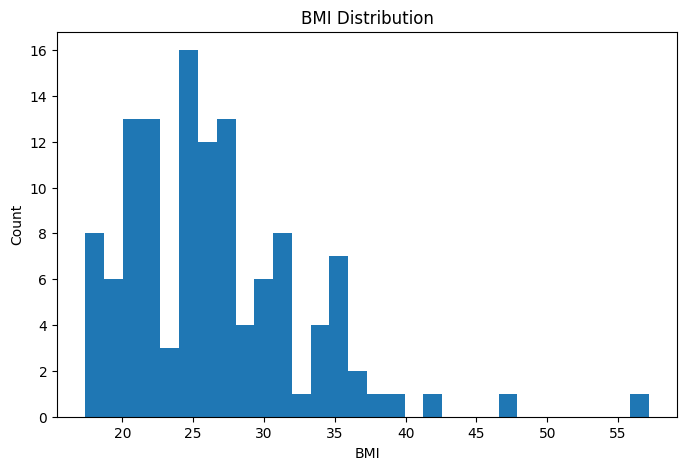

In [111]:
plt.figure(figsize=(8,5))
plt.hist(df_features['BMI'], bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

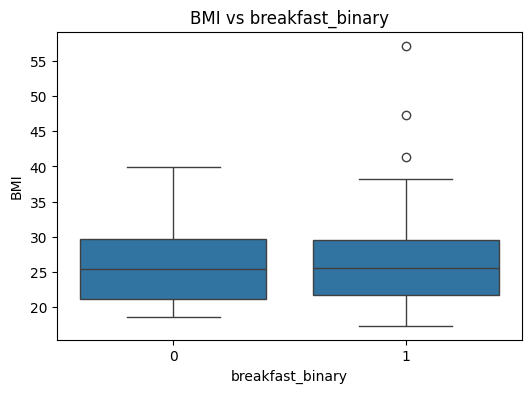

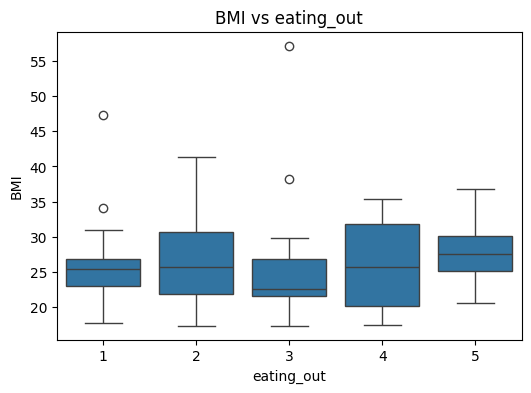

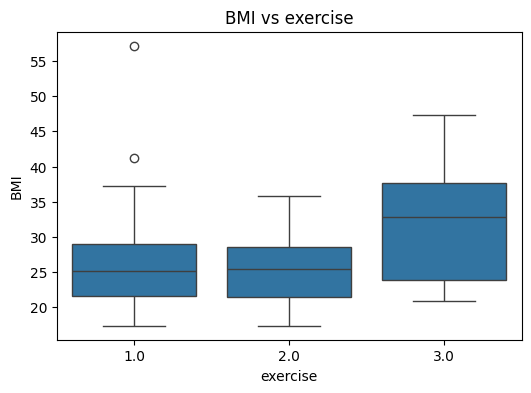

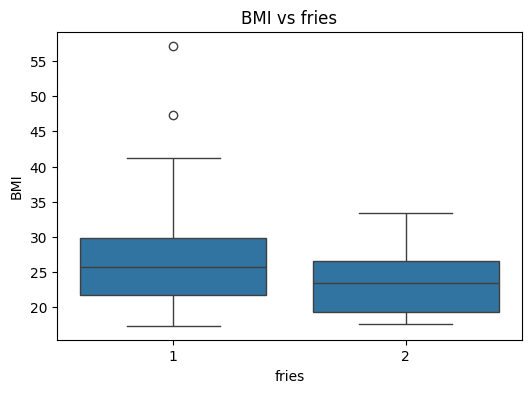

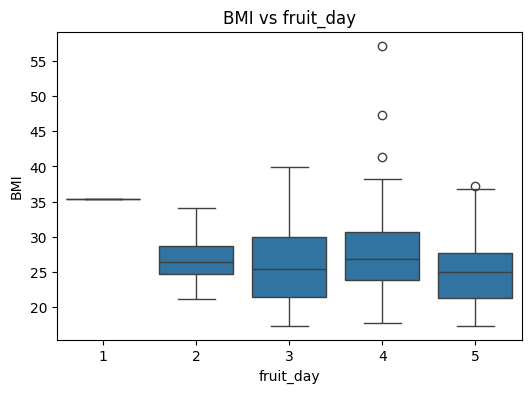

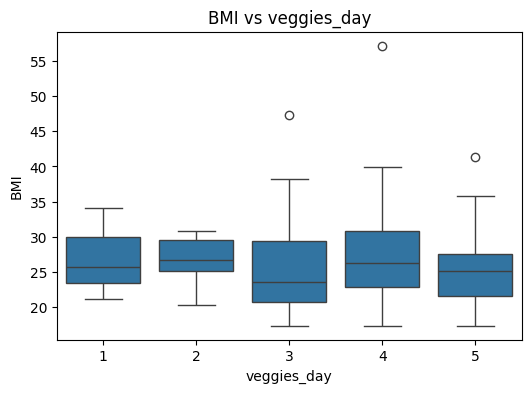

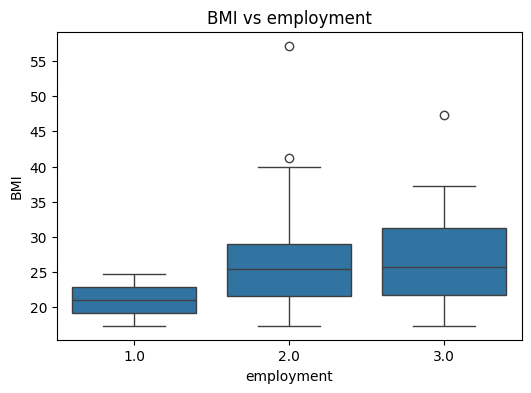

In [112]:
features_to_plot = [
    'breakfast_binary',
    'eating_out',
    'exercise',
    'fries',
    'fruit_day',
    'veggies_day',
    'employment'
]
for col in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_features[col], y=df_features['BMI'])
    plt.title(f'BMI vs {col}')
    plt.show()

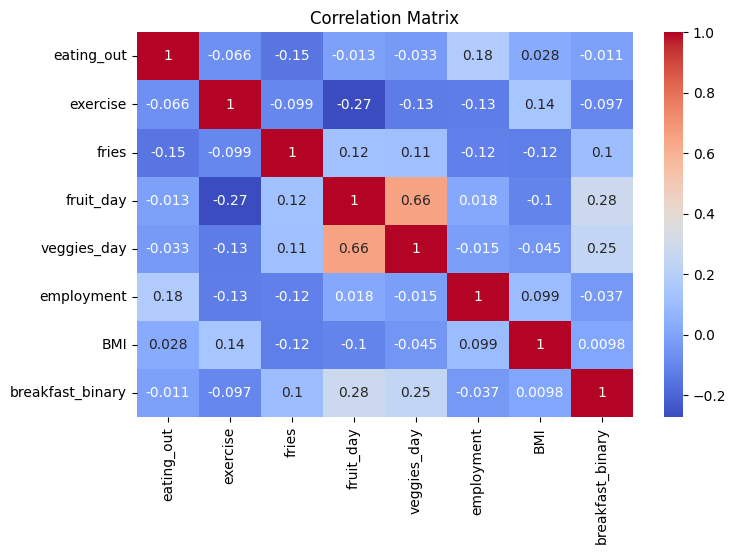

In [113]:
plt.figure(figsize=(8,5))
corr = df_features.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

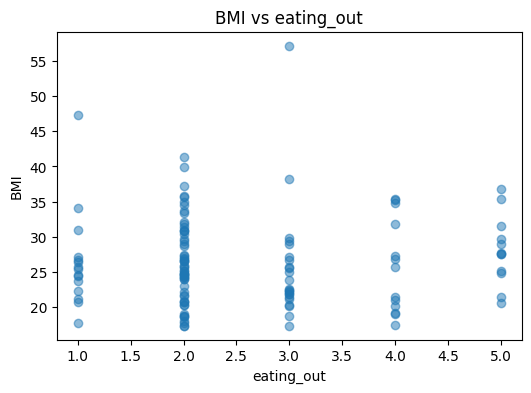

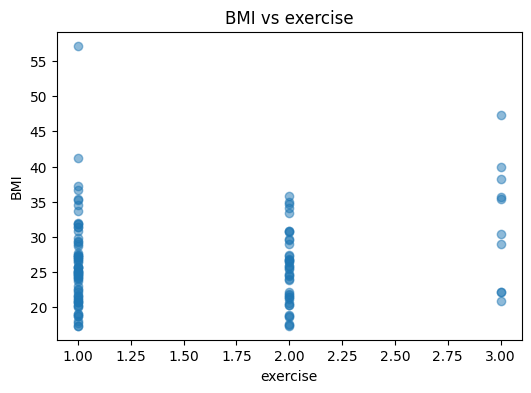

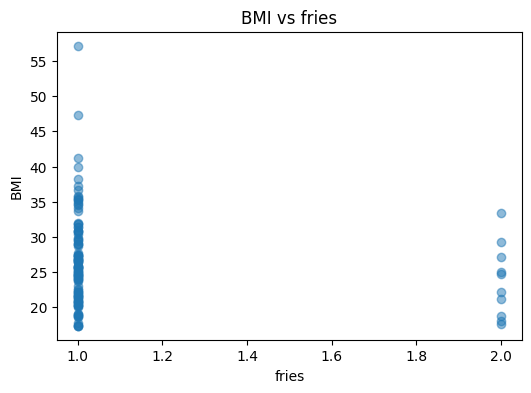

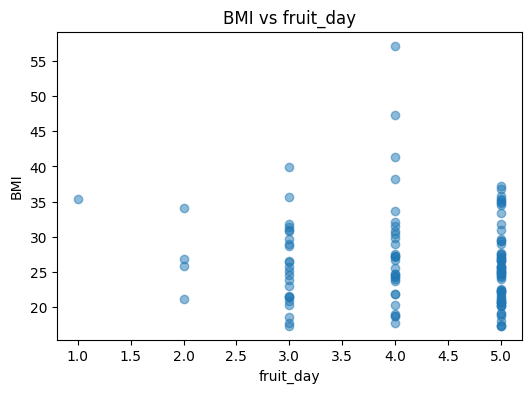

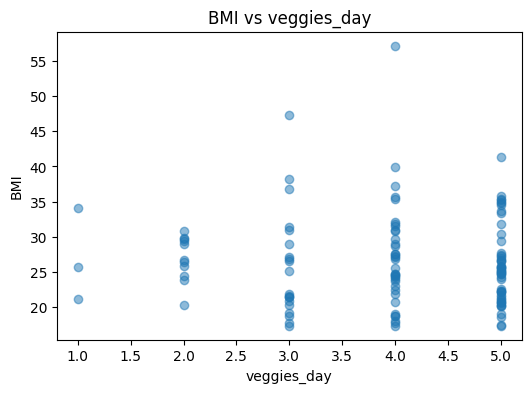

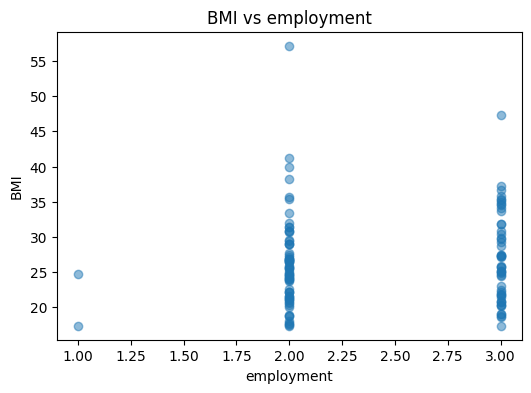

In [114]:
ordinal_features = ['eating_out','exercise','fries','fruit_day','veggies_day','employment']

for col in ordinal_features:
    plt.figure(figsize=(6,4))
    plt.scatter(df_features[col], df_features['BMI'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('BMI')
    plt.title(f'BMI vs {col}')
    plt.show()

In [115]:
for col in features_to_plot:
    print(f"\nAverage BMI by {col}:")
    print(df_features.groupby(col)['BMI'].mean())


Average BMI by breakfast_binary:
breakfast_binary
0    26.219603
1    26.422800
Name: BMI, dtype: float64

Average BMI by eating_out:
eating_out
1    26.553165
2    26.448752
3    25.653214
4    25.778754
5    28.087034
Name: BMI, dtype: float64

Average BMI by exercise:
exercise
1.0    26.185179
2.0    25.394365
3.0    32.117651
Name: BMI, dtype: float64

Average BMI by fries:
fries
1    26.639562
2    23.752584
Name: BMI, dtype: float64

Average BMI by fruit_day:
fruit_day
1    35.413577
2    27.001774
3    25.931702
4    28.219387
5    25.518614
Name: BMI, dtype: float64

Average BMI by veggies_day:
veggies_day
1    27.015798
2    26.928294
3    25.984327
4    27.215804
5    25.839276
Name: BMI, dtype: float64

Average BMI by employment:
employment
1.0    21.077085
2.0    26.120805
3.0    26.983300
Name: BMI, dtype: float64


**Overall Interpretation**
1. Breakfast:
Not a big difference in BMI between breakfast-eaters and non-eaters even though it was seen that people who dont consume breakfast tend to have higher BMI is some cases.

2. Eating Out: Mostly flat trend. Only the highest frequency group shows a bump in BMI.

3. Exercise: Strong inverse pattern: lower exercise frequency → significantly higher BMI.

4. Fries: Higher fries frequency is associated with higher BMI.

5. Fruit Intake: Very low fruit consumption strongly relates to high BMI.Higher fruit intake → generally lower BMI.

6. Vegetable Intake: More veggies = slightly lower BMI. Not a strong effect, but consistent.

7. Employment (Activity Level): Category 1 has noticeably lower BMI than categories 2 & 3.

**Conclusion**

Exercise habits, fries consumption, fruit intake, and employment activity level show the clearest relationships with BMI. Breakfast and eating-out frequency have weak or negligible influence in this dataset.